In [ ]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

#Importação de biblioteca 

In [ ]:
dados = read_csv('/content/irisflower.csv',sep=',')
dados
#Variável que recebe dados da base

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
X = dados.values[:,0:4]
Y = dados.values[:,4]


In [ ]:
X = X.astype('float32')

In [ ]:
encoder = LabelEncoder() #(Enconder = objeto)
encoder.fit(Y) #(Enquadramento/Organizacional)
encoded_y = encoder.transform(Y)
Y2 = np_utils.to_categorical(encoded_y)
Y2


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y2,test_size=0.20)


In [ ]:
#rede neural
model = Sequential()
model.add(Dense(10,activation='tanh',kernel_initializer='he_normal',input_shape=(4,)))
model.add(Dense(5, activation='relu')) #n<0 -> 0 / n>0 -> n
model.add(Dense(5,activation='relu'))
model.add(Dense(3,activation='softmax')) #multiclasse 


In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [ ]:
history = model.fit(xtrain,ytrain, validation_data=(xtest,ytest),epochs=300,batch_size=32,verbose=1)


Epoch 1/300
4/4 [==============================] - 1s 68ms/step - loss: 1.4831 - accuracy: 0.3109 - val_loss: 1.2756 - val_accuracy: 0.4333
Epoch 2/300
4/4 [==============================] - 0s 9ms/step - loss: 1.4376 - accuracy: 0.3109 - val_loss: 1.2453 - val_accuracy: 0.4333
Epoch 3/300
4/4 [==============================] - 0s 9ms/step - loss: 1.3959 - accuracy: 0.3109 - val_loss: 1.2188 - val_accuracy: 0.4333
Epoch 4/300
4/4 [==============================] - 0s 9ms/step - loss: 1.3594 - accuracy: 0.3109 - val_loss: 1.1959 - val_accuracy: 0.4333
Epoch 5/300
4/4 [==============================] - 0s 58ms/step - loss: 1.3261 - accuracy: 0.3109 - val_loss: 1.1762 - val_accuracy: 0.4333
Epoch 6/300
4/4 [==============================] - 0s 9ms/step - loss: 1.2962 - accuracy: 0.3109 - val_loss: 1.1596 - val_accuracy: 0.4333
Epoch 7/300
4/4 [==============================] - 0s 10ms/step - loss: 1.2697 - accuracy: 0.3109 - val_loss: 1.1456 - val_accuracy: 0.4333
Epoch 8/300
4/4 [=======

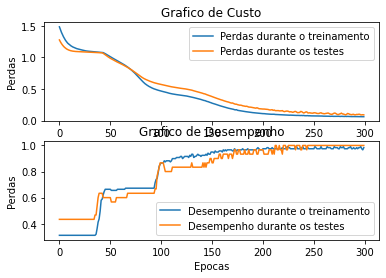

In [ ]:
plt.subplot(211)
plt.title('Grafico de Custo')
plt.plot(history.history['loss'],label= 'Perdas durante o treinamento')
plt.plot(history.history['val_loss'],label= 'Perdas durante os testes')
plt.xlabel('Epocas')
plt.ylabel('Perdas')
plt.legend()

plt.subplot(212)
plt.title('Grafico de Desempenho')
plt.plot(history.history['accuracy'],label= 'Desempenho durante o treinamento')
plt.plot(history.history['val_accuracy'],label= 'Desempenho durante os testes')
plt.xlabel('Epocas')
plt.ylabel('Perdas')
plt.legend()
plt.show() 
